# Supervised Learning

## Types
Supervised learning encompasses two main types of tasks: classification and regression.

- Classification: If the output of the data is categorical or ordinal, the task is classification.
    - The model predicts a class label for each sample.
    - Example: Spam detection
        - The output categories are binary: Normal email or Spam email
        - These categories can be represented numerically as 0 and 1.
    - Example: Recognizing Hand-written Digits
        - The output comprises ten categories: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9

- Regression: If the output of the data is continuous, the task is regression.
    - In this case, the model predicts a real number that can fall within a range.
    - Example: House Price Prediction
        - House prices can assume any value within a range.

Identifying whether a task is classification or regression can often be done by examining the nature of the output values.
-  If the output can only take on specific discrete values, it's likely a classification task.
-   Conversely, if the output can span a continuous range of values, it's likely a regression task.
    - In the Hand-written Digit dataset, the output can only be one of the ten digit classes, making it a classification task.
    - If two houses are priced at 260,000 dollars and 270,000 dollars, it's feasible for another house to have a price anywhere between these values, making it a regression task.

For infinitely discrete outputs, regression can be employed by treating them as continuous variables.

## Learning Process
Machine learning algorithms consist of a collection of candidate functions and a methodology for selecting the most suitable function from this set, which best fits the provided training data.


For instance, in linear regression with a single input variable, the candidate functions are linear functions in the form of 
$f(x)=mx+b$. The linear regression algorithm selects the linear function that is closest to the all training points.


![](pict/learning_process.png)

## Model Complexity

In the previous chapter, we have seen that it is not hard to train a model and get predicted values for a new data.

Choosing an appropriate ML alghorithm depending on the data is very crucial. There are many available ML algorithms that can be used, however the important thing is the performance of the model on a new data. Most of the ML algorithms can memorize instead of learn. Our ultimate goal is to have a model which works well on an unseen data. 

In the given dataset, dots represents the entire dataset (population), which is practically impossible to obtain. 
- For simplicity, let's assume that the entire dataset is available, and it shows a strong linear relationship between the input and output variables.
- While the relationship is not perfect, it is sufficiently strong.

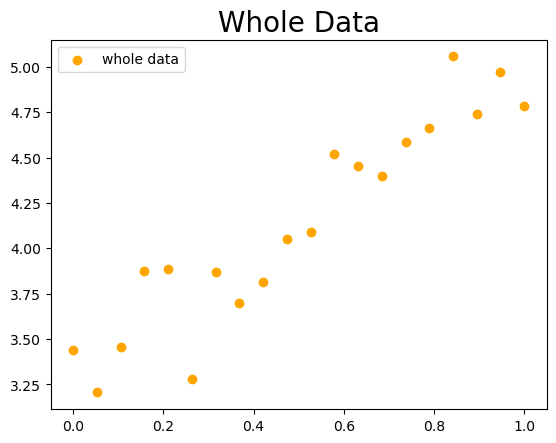

In [1]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(0)
noise = np.random.randn(20)/4

X = np.linspace(0,1,20)
y = 2*X+3+noise

plt.scatter(X,y, label='whole data', c='orange')
plt.title('Whole Data', fontsize=20)
plt.legend();

Now, let's consider a sample of this data. The navy-colored dots represent the sample data.
- In a data science or machine learning project, we typically work with sample datasets of varying sizes.

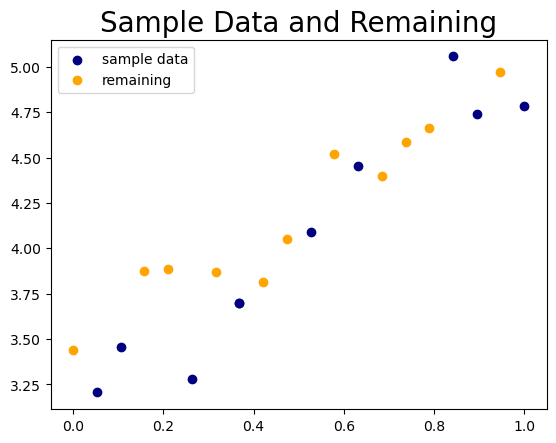

In [2]:
train = [1,5,7,10,16,19]
test  = [2,7,12,17] 
sample = train+test

X_sample = np.array([X[i] for i in sample])
y_sample = np.array([y[i] for i in sample])

X_rem  = np.array([X[i] for i in set(range(20))-set(sample)])
y_rem  = np.array([y[i] for i in set(range(20))-set(sample)])

plt.scatter(X_sample,y_sample, label='sample data', c='navy')
plt.scatter(X_rem,y_rem, label='remaining', c='orange')
plt.title('Sample Data and Remaining', fontsize=20)
plt.legend();

- Now, let's split the sample dataset into training and test sets. For simplicity, we are omitting the validation set.

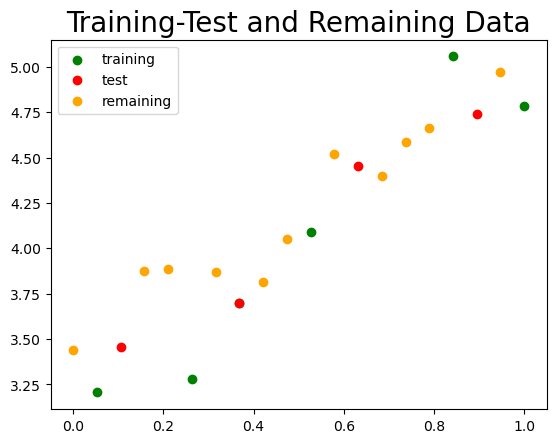

In [3]:
X_train = np.array([X[i] for i in train])
y_train = np.array([y[i] for i in train])

X_test  = np.array([X[i] for i in test])
y_test  = np.array([y[i] for i in test])


plt.scatter(X_train,y_train, label='training', c='g')
plt.scatter(X_test,y_test, label='test', c='r')
plt.scatter(X_rem,y_rem, label='remaining', c='orange')
plt.title('Training-Test and Remaining Data', fontsize=20)
plt.legend();

Let's remove all points except for the training and test points. 
- This is typically what we have at the beginning of an ML project.

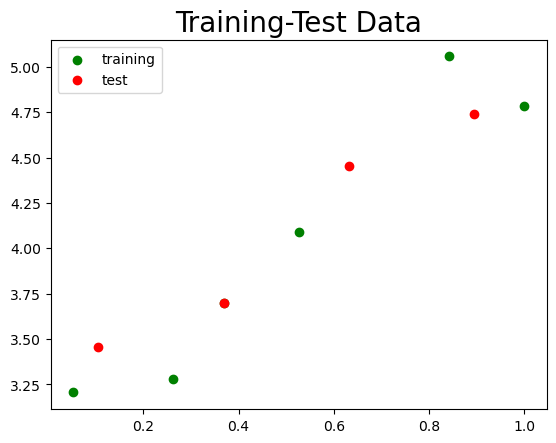

In [4]:
plt.scatter(X_train,y_train, label='training', c='g')
plt.scatter(X_test,y_test, label='test', c='r')
plt.title('Training-Test Data', fontsize=20)
plt.legend();

Let's find a linear line that represents the general trend of this data. 
- While it may not perfectly fit the training data, it should capture the overall pattern of the points.

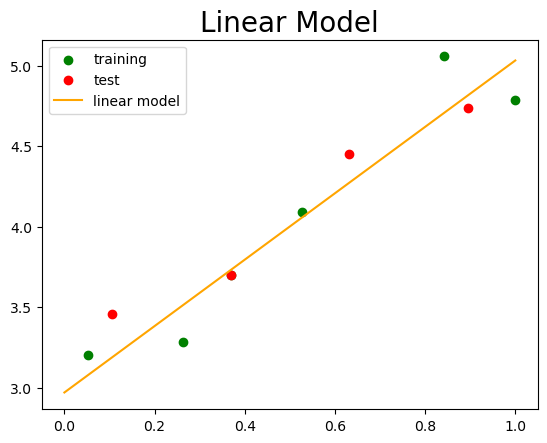

In [5]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train.reshape(-1,1),y_train)
y_l = lin_reg.predict(X.reshape(-1,1))

plt.scatter(X_train,y_train, label='training', c='g')
plt.scatter(X_test,y_test, label='test', c='r')
plt.plot(X,y_l,label= 'linear model', c='orange')
plt.title('Linear Model', fontsize=20)
plt.legend();

Let's add the remaining points to observe how well the linear model performs overall. 
- While the model may not perfectly capture every point, it should still reflect the general trend exhibited by the data.

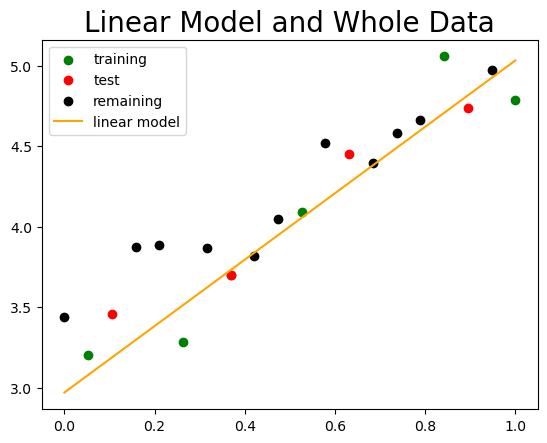

In [6]:
plt.scatter(X_train,y_train, label='training', c='g')
plt.scatter(X_test,y_test, label='test', c='r')
plt.scatter(X_rem,y_rem, label='remaining', c='k')

plt.plot(X,y_l,label= 'linear model', c='orange')
plt.title('Linear Model and Whole Data', fontsize=20)
plt.legend();

Now let's perform a similar modeling using a polynomial. 
- As observed, the polynomial model fits the training data perfectly.
- However, the question arises: does it truly capture the general trend exhibited by the data points?

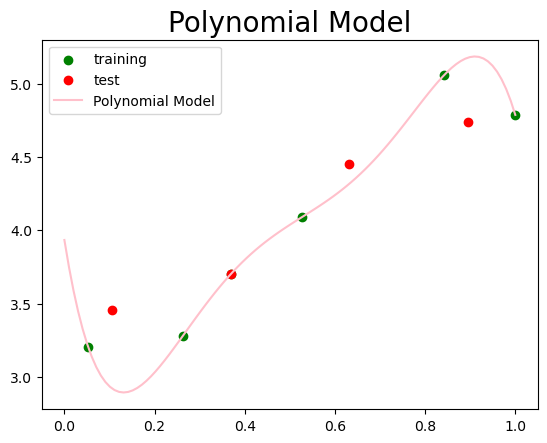

In [7]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 5)
X_poly = poly.fit_transform(X_train.reshape(-1,1))

lin_poly = LinearRegression()
lin_poly.fit(X_poly, y_train)

X_s = np.linspace(0,1,100)
y_p = lin_poly.predict(poly.fit_transform(X_s.reshape(-1,1)))

plt.scatter(X_train,y_train, label='training', c='g')
plt.scatter(X_test,y_test, label='test', c='r')

plt.plot(X_s,y_p, label='Polynomial Model', c='pink')
plt.title('Polynomial Model', fontsize=20)
plt.legend();

Let's compare the linear and polynomial models by plotting them together on the same graph.

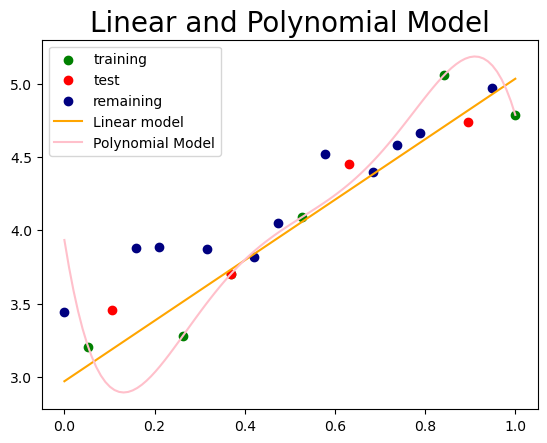

In [8]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 5)
X_poly = poly.fit_transform(X_train.reshape(-1,1))

lin_poly = LinearRegression()
lin_poly.fit(X_poly, y_train)

X_s = np.linspace(0,1,100)
y_p = lin_poly.predict(poly.fit_transform(X_s.reshape(-1,1)))

plt.scatter(X_train,y_train, label='training', c='g')
plt.scatter(X_test,y_test, label='test', c='r')
plt.scatter(X_rem,y_rem, label='remaining', c='navy')

plt.plot(X,y_l,label= 'Linear model', c='orange')
plt.plot(X_s,y_p, label='Polynomial Model', c='pink')
plt.title('Linear and Polynomial Model', fontsize=20)
plt.legend()
plt.savefig('pict/linear_poly.png');

Although the polynomial function provides a better fit to the data compared to the linear function, the linear model captures the general trend exhibited by the data more effectively. 

Therefore, rather than opting for a more complex model, it's essential to select the appropriate model based on the characteristics of the given data.

At this point, a more complex model can be seen as one that includes a broader range of candidate functions or parameters for generating functions.

In the dataset provided below, the polynomial model more accurately captures the overall pattern of the data points when compared to the linear model.

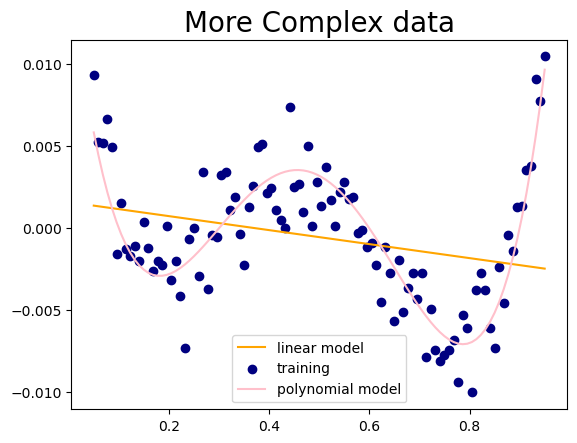

In [9]:
N = 100
np.random.seed(0)
noise = np.random.randn(N)/500
X = np.linspace(0.05,0.95,N)
y = (X-0.1)*(X-0.3)*(X-0.6)*(X-0.9)+noise

lin_reg = LinearRegression()
lin_reg.fit(X.reshape(-1,1), y)
y_l = lin_reg.predict(X.reshape(-1,1))

plt.plot(X,y_l,label= 'linear model', c='orange')
plt.scatter(X,y, label='training', c='navy')

plt.plot(X,  (X-0.1)*(X-0.3)*(X-0.6)*(X-0.9), label='polynomial model', c='pink')
plt.title('More Complex data', fontsize=20)
plt.legend()
plt.savefig('pict/complex_data.png');

## Overfitting

During the training phase of a machine learning process, it's possible to find a function that perfectly fits the training data. 
- However, the goal of building a machine learning algorithm isn't solely to achieve this perfect fit, but rather to make accurate predictions on new, unseen data—data not present in the training set.
- This ability to generalize from the training set to the test set is what learning truly entails.

In the graph below, the polynomial function exhibits overfitting as it perfectly fits the training set (memorizes), yet fails to capture the general trend.

![](pict/linear_poly.png)

Consider the training set as analogous to questions answered in a classroom.
- If a student memorizes all these questions along with their solutions, they can answer them perfectly whenever encountered.
- However, their performance on questions related to the subject matter but not covered in the class will likely be poor.
- This indicates a lack of true learning and the inability to apply learned concepts to new situations—an issue known as overfitting in machine learning.
- One of the primary causes of overfitting is the use of an excessively complex model for the data. As a result, rather than genuinely learning the underlying patterns, the model tends to memorize—or perfectly fit—the training data.
  
In cases of overfitting:
- The training score is high while the test score is low.
- The model is overly complex for the data.
- The model essentially memorizes the training data.

To overcome overfitting, implement the following techniques:
- Simplify the model
- Reduce the number of features.
- Apply regularization methods to restrict the model's complexity, often through adjustments of hyperparameters.
- Enhance the training dataset by increasing its size to improve the model's generalization ability.
- Reduce noise in the training data by enhancing data quality or eliminating outliers.


## Underfitting
Unlike overfitting, underfitting occurs when the model performs poorly on the training set used for model building. 
- This implies that the model not only fails to learn but also struggles to memorize the training data.

In the graph, the straight line shows underfitting as it doesn't fit the training data well.
![](pict/complex_data.png)


In cases of underfitting:
- The training score is low.
- The model is overly simplistic for the data.
- The model even fails to memorize the training data.

To address underfitting, consider implementing the following techniques:
- Employ a more complex model.
- Enhance the quality of features.
- Reduce the constraints (hypertuning).



## Trade-off 
There exists a trade-off between overfitting and underfitting. Generally, the behavior of training and test scores can be summarized as follows:

- When the model is overly simple, both training and test scores are low, indicating underfitting.
- Increasing model complexity typically leads to an initial increase in both training and test scores until an optimal complexity level is reached.
- This optimal complexity level represents the ideal balance between model complexity and data fitting.
- Beyond this optimal point, further increasing model complexity causes the model to memorize the training data rather than generalize, resulting in overfitting.
- Consequently, the training score increases while the test score decreases.

The graph below illustrates the general behavior of training and test scores as the complexity of the model changes.
A model that generalizes well is characterized by high and closely aligned training and test scores.

![](pict/train_test_complex.png)

The following two graphs illustrate the impact of model complexity on training and test scores. While the format differs from the previous graph, it offers insights into selecting appropriate parameters to mitigate underfitting and overfitting.

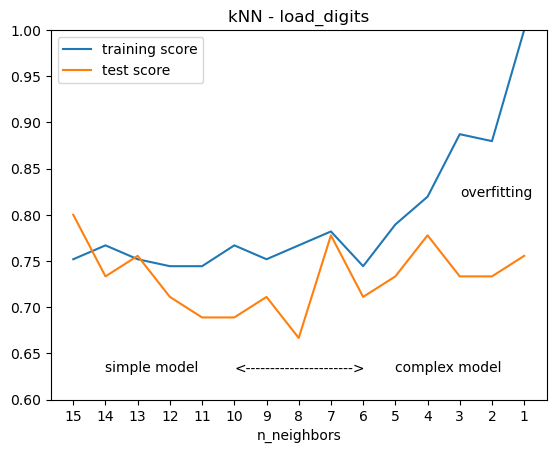

In [108]:
from sklearn.datasets import load_wine
X, y = load_wine(return_X_y=True)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

from sklearn.neighbors import KNeighborsClassifier

N = 15

training, test = [], [] 
neighbors = range(N,0,-1)

for i in neighbors:
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    training.append(clf.score(X_train, y_train))
    test.append(clf.score(X_test, y_test))


plt.plot(training, label='training score')
plt.plot(test, label='test score')
plt.text(1, 0.63, 'simple model' )
plt.text(10, 0.63, 'complex model' )
plt.text(5,0.63, '<'+'-'*22+'>')
plt.text(12, 0.82, 'overfitting')

plt.xticks(range(N), neighbors )
plt.ylim(0.6, 1)
plt.xlabel('n_neighbors')
plt.title('kNN - load_digits')
plt.legend();

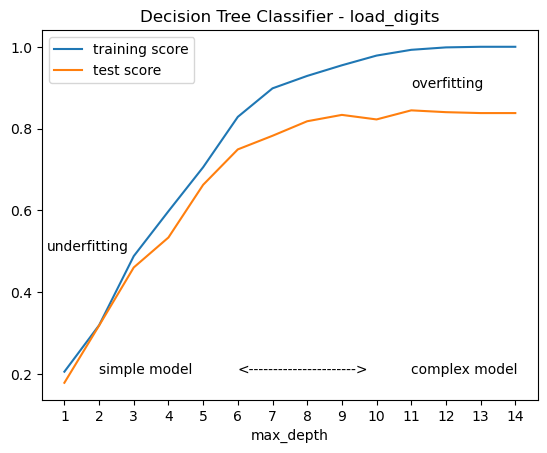

In [109]:
from sklearn.datasets import load_digits
X, y = load_digits(return_X_y=True)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

from sklearn.tree import DecisionTreeClassifier

training, test = [], [] 
for i in range(1,15):
    clf = DecisionTreeClassifier(max_depth=i, random_state=0, )
    clf.fit(X_train, y_train)
    training.append(clf.score(X_train, y_train))
    test.append(clf.score(X_test, y_test))


plt.plot(training, label='training score')
plt.plot(test, label='test score')
plt.text(1, 0.2, 'simple model' )
plt.text(10, 0.2, 'complex model' )
plt.text(5,0.2, '<'+'-'*22+'>')
plt.text(-0.5, 0.5, 'underfitting')
plt.text(10, 0.9, 'overfitting')
         
plt.xticks(range(14),range(1,15) )
plt.xlabel('max_depth')
plt.title('Decision Tree Classifier - load_digits')
plt.legend();

## Appendix

### Population and Sample
A population is the set of all instances of interest in a study. 

A sample, on the other hand, is a smaller subset of the population that ideally represents the general characteristics of the population. 
- Sampling is often necessary due to practical limitations in data collection, such as time, cost, and accessibility.
- For instance, in a study on the math proficiency of ninth-grade students in the US, it may be impractical to gather data from every student in the country.
- Instead, a sample of, say, 1,000 students may be selected to represent different demographics and regions.

### Types of Data

1. Categorical (Qualitative):
    - Attributes, labels, non-numerical entries.
    - Represented by words or codes.
    - Examples:
        - Verbal Label: Gender (F, M), Color (Red, Green, Blue)
        - Coded: Gender (0, 1)
        - Coded: Color (0, 1, 2)
          
2. Numerical (Quantitative):
    - Numerical measurements, counts, results of mathematical operations.
    - Examples: Salary, number of claims, amount of rainfall.
    - Types:
        - Discrete: This term refers to data where there are finitely many possible values between any two observed values, and there are no values between consecutive ones.
            - The number children in a family.
        - Continuous: This term describes data where there are infinitely many possible values between any two observed values.
            - Percentage changes, house prices, cost, profit, salary.
         

**Ordinal Data**:
- Qualitative (categorical) or quantitative (numerical).
- There is a ranking (order).
- Mathematical operations: min, max, median, quartiles, interquartile range.
- Examples: Small, medium, large; Elementary, middle, high school.